# Problem 1: Basics of Neural Networks
* <b>Learning Objective:</b> In this problem, you are asked to implement a basic multi-layer fully connected neural network from scratch, including forward and backward passes of certain essential layers, to perform an image classification task on CIFAR-10 dataset. You need to implement essential functions in different indicated python files under directory `lib`.
* <b>Provided Code:</b> We provide the skeletons of classes you need to complete. Forward checking and gradient checkings are provided for verifying your implementation as well.
* <b>TODOs:</b> You are asked to implement the forward passes and backward passes for standard layers and loss functions, various widely-used optimizers, and part of the training procedure. And finally we want you to train a network from scratch on your own.

In [1]:
from lib.fully_conn import *
from lib.layer_utils import *
from lib.grad_check import *
from lib.datasets import *
from lib.optim import *
from lib.train import *
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Loading the data (CIFAR-10)
Run the following code block to download CIFAR-10 dataset and load in the properly splitted CIFAR-10 data.

In [4]:
!./get_datasets.sh

--2019-02-21 20:40:10--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘data/cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M   135KB/s    in 10m 43s 

2019-02-21 20:50:54 (259 KB/s) - ‘data/cifar-10-python.tar.gz’ saved [170498071/170498071]

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [5]:
data = CIFAR10_data()
for k, v in data.items():
    print ("Name: {} Shape: {}".format(k, v.shape))

Name: data_train Shape: (49000, 3, 32, 32)
Name: labels_train Shape: (49000,)
Name: data_val Shape: (1000, 3, 32, 32)
Name: labels_val Shape: (1000,)
Name: data_test Shape: (1000, 3, 32, 32)
Name: labels_test Shape: (1000,)


## Implement Standard Layers
You will now implement all the following standard layers commonly seen in a fully connected neural network. Please refer to the file `lib/layer_utils.py`. Take a look at each class skeleton, and we will walk you through the network layer by layer. We provide results of some examples we pre-computed for you for checking the forward pass, and also the gradient checking for the backward pass.

## FC Forward
In the class skeleton `flatten` and `fc` in `lib/layer_utils.py`, please complete the forward pass in function `forward`, the input to the fc layer may not be of dimension (batch size, features size), it could be an image or any higher dimensional data. Make sure that you handle this dimensionality issue. 

In [6]:
%reload_ext autoreload

# Test the fc forward function
input_bz = 3
input_dim = (7, 6, 4)
output_dim = 4

input_size = input_bz * np.prod(input_dim)
weight_size = output_dim * np.prod(input_dim)

flatten_layer = flatten(name="flatten_test")
single_fc = fc(np.prod(input_dim), output_dim, init_scale=0.02, name="fc_test")

x = np.linspace(-0.1, 0.4, num=input_size).reshape(input_bz, *input_dim)
w = np.linspace(-0.2, 0.2, num=weight_size).reshape(np.prod(input_dim), output_dim)
b = np.linspace(-0.3, 0.3, num=output_dim)

single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

out = single_fc.forward(flatten_layer.forward(x))

correct_out = np.array([[0.63910291, 0.83740057, 1.03569824, 1.23399591],
                        [0.61401587, 0.82903823, 1.04406058, 1.25908294],
                        [0.58892884, 0.82067589, 1.05242293, 1.28416997]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-8
print ("Difference: ", rel_error(out, correct_out))

Difference:  4.02601593296122e-09


## FC Backward
Please complete the function `backward` as the backward pass of the fc layer. Follow the instructions in the comments to store gradients into the predefined dictionaries in the attributes of the class. Parameters of the layer are also stored in the predefined dictionary.

In [7]:
%reload_ext autoreload

# Test the fc backward function
x = np.random.randn(15, 2, 2, 3)
w = np.random.randn(12, 15)
b = np.random.randn(15)
dout = np.random.randn(15, 15)

flatten_layer = flatten(name="flatten_test")
x = flatten_layer.forward(x)
single_fc = fc(np.prod(x.shape[1:]), 15, init_scale=5e-2, name="fc_test")
single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

dx_num = eval_numerical_gradient_array(lambda x: single_fc.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: single_fc.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: single_fc.forward(x), b, dout)

out = single_fc.forward(x)
dx = single_fc.backward(dout)
dw = single_fc.grads[single_fc.w_name]
db = single_fc.grads[single_fc.b_name]

# The error should be around 1e-9
print ("dx Error: ", rel_error(dx_num, dx))
# The errors should be around 1e-10
print ("dw Error: ", rel_error(dw_num, dw))
print ("db Error: ", rel_error(db_num, db))

dx Error:  9.244097361609026e-10
dw Error:  3.1789162848521815e-09
db Error:  4.804107322107059e-11


## ReLU Forward
In the class skeleton `relu` in `lib/layer_utils.py`, please complete the `forward` pass.

In [8]:
%reload_ext autoreload

# Test the relu forward function
x = np.linspace(-1.5, 1.5, num=12).reshape(3, 4)
relu_f = relu(name="relu_f")

out = relu_f.forward(x)

correct_out = np.array([[0.,          0.,         0.,         0.        ],
                        [0.,          0.,         0.13636364, 0.40909091],
                        [0.68181818,  0.95454545, 1.22727273, 1.5      ]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-7
print ("Difference: ", rel_error(out, correct_out))

Difference:  1.3333333629634122e-08


## ReLU Backward
Please complete the `backward` pass of the class `relu`.

In [9]:
%reload_ext autoreload

# Test the relu backward function
x = np.random.randn(15, 15)
dout = np.random.randn(*x.shape)
relu_b = relu(name="relu_b")

dx_num = eval_numerical_gradient_array(lambda x: relu_b.forward(x), x, dout)

out = relu_b.forward(x)
dx = relu_b.backward(dout)

# The error should not be larger than 1e-10
print ("dx Error: ", rel_error(dx_num, dx))

dx Error:  3.275610605888507e-12


## Dropout Forward
In the class `dropout` in `lib/layer_utils.py`, please complete the `forward` pass.  
Remember that the dropout is only applied during training phase, you should pay attention to this while implementing the function.
##### Important Note1: The probability argument input to the function is the "keep probability": probability that each element is kept
##### Important Note2: If the keep_prob is set to 0, make it as no drop out

In [10]:
%reload_ext autoreload

x = np.random.randn(100, 100) + 5.0

print ("----------------------------------------------------------------")
for p in [0, 0.25, 0.50, 0.75, 1]:
    dropout_f = dropout(keep_prob=p)
    out = dropout_f.forward(x, True)
    out_test = dropout_f.forward(x, False)

    print ("Dropout Keep Prob = ", p)
    print ("Mean of input: ", x.mean())
    print ("Mean of output during training time: ", out.mean())
    print ("Mean of output during testing time: ", out_test.mean())
    print ("Fraction of output set to zero during training time: ", (out == 0).mean())
    print ("Fraction of output set to zero during testing time: ", (out_test == 0).mean())
    print ("----------------------------------------------------------------")

----------------------------------------------------------------
Dropout Keep Prob =  0
Mean of input:  4.99814522878997
Mean of output during training time:  4.99814522878997
Mean of output during testing time:  4.99814522878997
Fraction of output set to zero during training time:  0.0
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout Keep Prob =  0.25
Mean of input:  4.99814522878997
Mean of output during training time:  1.2358226727111876
Mean of output during testing time:  1.2495363071974925
Fraction of output set to zero during training time:  0.7545
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout Keep Prob =  0.5
Mean of input:  4.99814522878997
Mean of output during training time:  2.5193311608984437
Mean of output during testing time:  2.499072614394985
Fraction of output set to zero during training time:  0.4958
Frac

## Dropout Backward
Please complete the `backward` pass. Again remember that the dropout is only applied during training phase, handle this in the backward pass as well.

In [11]:
%reload_ext autoreload

x = np.random.randn(5, 5) + 5
dout = np.random.randn(*x.shape)

keep_prob = 0.75
dropout_b = dropout(keep_prob, seed=100)
out = dropout_b.forward(x, True)
dx = dropout_b.backward(dout)
dx_num = eval_numerical_gradient_array(lambda xx: dropout_b.forward(xx, True), x, dout)

# The error should not be larger than 1e-9
print ('dx relative error: ', rel_error(dx, dx_num))

dx relative error:  1.892895811471007e-11


## Testing cascaded layers: FC + ReLU
Please find the `TestFCReLU` function in `lib/fully_conn.py`. <br />
You only need to complete few lines of code in the TODO block. <br />
Please design an `FC --> ReLU` two-layer-mini-network where the parameters of them match the given x, w, and b <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. <br />
Here you only modify the param_name part, the `_w`, and `_b` are automatically assigned during network setup 

In [12]:
%reload_ext autoreload

x = np.random.randn(3, 4, 5)  # the input features
w = np.random.randn(20, 10)   # the weight of fc layer
b = np.random.randn(10)       # the bias of fc layer
dout = np.random.randn(3, 10) # the gradients to the output, notice the shape

tiny_net = TestFCReLU()

# param_name should be replaced accordingly
param_name = "fc1"
tiny_net.net.assign(param_name + "_w", w)
tiny_net.net.assign(param_name + "_b", b)

out = tiny_net.forward(x)
dx = tiny_net.backward(dout)

# param_name should be replaced accordingly
dw = tiny_net.net.get_grads(param_name + "_w")
db = tiny_net.net.get_grads(param_name + "_b")

dx_num = eval_numerical_gradient_array(lambda x: tiny_net.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: tiny_net.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: tiny_net.forward(x), b, dout)

# The errors should not be larger than 1e-7
print ("dx error: ", rel_error(dx_num, dx))
print ("dw error: ", rel_error(dw_num, dw))
print ("db error: ", rel_error(db_num, db))

dx error:  5.597226343541658e-10
dw error:  3.285305783889331e-10
db error:  2.5551839143195873e-11


## SoftMax Function and Loss Layer
In the `lib/layer_utils.py`, please first complete the function `softmax`, which will be used in the function `cross_entropy`. Then, implement `corss_entropy` using `softmax`.
Please refer to the lecture slides of the mathematical expressions of the cross entropy loss function, and complete its forward pass and backward pass.

In [13]:
%reload_ext autoreload

num_classes, num_inputs = 6, 100
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

test_loss = cross_entropy()

dx_num = eval_numerical_gradient(lambda x: test_loss.forward(x, y), x, verbose=False)

loss = test_loss.forward(x, y)
dx = test_loss.backward()

# Test softmax_loss function. Loss should be around 1.792
# and dx error should be at the scale of 1e-8 (or smaller)
print ("Cross Entropy Loss: ", loss)
print ("dx error: ", rel_error(dx_num, dx))

Cross Entropy Loss:  1.7917317732407947
dx error:  7.0960832780684405e-09


## Test a Small Fully Connected Network
Please find the `SmallFullyConnectedNetwork` function in `lib/fully_conn.py`. <br />
Again you only need to complete few lines of code in the TODO block. <br />
Please design an `FC --> ReLU --> FC --> ReLU` network where the shapes of parameters match the given shapes <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. <br />
Here you only modify the param_name part, the `_w`, and `_b` are automatically assigned during network setup 

In [14]:
%reload_ext autoreload

seed = 1234
np.random.seed(seed=seed)

model = SmallFullyConnectedNetwork()
loss_func = cross_entropy()

N, D, = 4, 4  # N: batch size, D: input dimension
H, C  = 30, 7 # H: hidden dimension, C: output dimension
std = 0.02
x = np.random.randn(N, D)
y = np.random.randint(C, size=N)

print ("Testing initialization ... ")

# param_name should be replaced accordingly
fc1 = "fc1"
fc2 = "fc2"

w1_std = abs(model.net.get_params(fc1 + "_w").std() - std)
b1 = model.net.get_params(fc1 + "_b").std()
w2_std = abs(model.net.get_params(fc2 + "_w").std() - std)
b2 = model.net.get_params(fc2 + "_b").std()

assert w1_std < std / 10, "First layer weights do not seem right"
assert np.all(b1 == 0), "First layer biases do not seem right"
assert w2_std < std / 10, "Second layer weights do not seem right"
assert np.all(b2 == 0), "Second layer biases do not seem right"
print ("Passed!")

print ("Testing test-time forward pass ... ")
w1 = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
w2 = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
b1 = np.linspace(-0.1, 0.9, num=H)
b2 = np.linspace(-0.9, 0.1, num=C)

# param_name should be replaced accordingly
model.net.assign(fc1 + "_w", w1)
model.net.assign(fc1 + "_b", b1)
model.net.assign(fc2 + "_w", w2)
model.net.assign(fc2 + "_b", b2)

feats = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.forward(feats)
correct_scores = np.asarray([[4.20670862, 4.87188359, 5.53705856, 6.20223352, 6.86740849, 7.53258346, 8.19775843],
                             [4.74826036, 5.35984681, 5.97143326, 6.58301972, 7.19460617, 7.80619262, 8.41777907],
                             [5.2898121,  5.84781003, 6.40580797, 6.96380591, 7.52180384, 8.07980178, 8.63779971],
                             [5.83136384, 6.33577326, 6.84018268, 7.3445921,  7.84900151, 8.35341093, 8.85782035]])
scores_diff = np.sum(np.abs(scores - correct_scores))
assert scores_diff < 1e-6, "Your implementation might went wrong!"
print ("Passed!")

print ("Testing the loss ...",)
y = np.asarray([0, 5, 1, 4])
loss = loss_func.forward(scores, y)
dLoss = loss_func.backward()
print (str.format("Loss from my code = {}", loss))
correct_loss = 2.90181552716
assert abs(loss - correct_loss) < 1e-10, "Your implementation might went wrong!"
print ("Passed!")

print ("Testing the gradients (error should be no larger than 1e-6) ...")
din = model.backward(dLoss)
for layer in model.net.layers:
    if not layer.params:
        continue
    for name in sorted(layer.grads):
        f = lambda _: loss_func.forward(model.forward(feats), y)
        grad_num = eval_numerical_gradient(f, layer.params[name], verbose=False)
        print ('%s relative error: %.2e' % (name, rel_error(grad_num, layer.grads[name])))

Testing initialization ... 
Passed!
Testing test-time forward pass ... 
Passed!
Testing the loss ...
Loss from my code = 2.901815527158027
Passed!
Testing the gradients (error should be no larger than 1e-6) ...
fc1_b relative error: 2.85e-09
fc1_w relative error: 7.76e-09
fc2_b relative error: 4.33e-07
fc2_w relative error: 3.03e-09


## Test a Fully Connected Network regularized with Dropout
Please find the `DropoutNet` function in `fully_conn.py` under lib directory. <br />
For this part you don't need to design a new network, just simply run the following test code <br />
If something goes wrong, you might want to double check your dropout implementation

In [15]:
%reload_ext autoreload

seed = 1234
np.random.seed(seed=seed)

N, D, C = 3, 15, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for keep_prob in [0, 0.25, 0.5]:
    print ("Dropout p =", keep_prob)
    model = DropoutNet(keep_prob=keep_prob, seed=seed)
    loss_func = cross_entropy()
    output = model.forward(X, True)
    loss = loss_func.forward(output, y)
    dLoss = loss_func.backward()
    dX = model.backward(dLoss)
    grads = model.net.grads

    print ("Error of gradients should be around or less than 1e-5")
    for name in sorted(grads):
        if name not in model.net.params.keys():
            continue
        f = lambda _: loss_func.forward(model.forward(X, True), y)
        grad_num = eval_numerical_gradient(f, model.net.params[name], verbose=False, h=1e-5)
        print ("{} relative error: {}".format(name, rel_error(grad_num, grads[name])))
    print ()

Dropout p = 0
Error of gradients should be around or less than 1e-5
fc1_b relative error: 5.84056468549173e-08
fc1_w relative error: 2.3619787034400103e-06
fc2_b relative error: 4.557166849374739e-08
fc2_w relative error: 7.639166173127875e-06
fc3_b relative error: 2.1827243320409778e-10
fc3_w relative error: 1.1814112799895045e-06

Dropout p = 0.25
Error of gradients should be around or less than 1e-5
fc1_b relative error: 1.3644583281452308e-06
fc1_w relative error: 1.6276662875250605e-05
fc2_b relative error: 7.330826452483702e-08
fc2_w relative error: 3.6125485377059722e-06
fc3_b relative error: 1.8805791343506273e-11
fc3_w relative error: 7.291474534467892e-08

Dropout p = 0.5
Error of gradients should be around or less than 1e-5
fc1_b relative error: 6.231954574189567e-08
fc1_w relative error: 1.5085633313466196e-05
fc2_b relative error: 5.062890114176113e-08
fc2_w relative error: 6.592781441233491e-06
fc3_b relative error: 5.4508430928357e-10
fc3_w relative error: 1.906738796399

## Training a Network
In this section, we defined a `TinyNet` class for you to fill in the TODO block in `lib/fully_conn.py`.
* Here please design a two layer fully connected network for this part.
* Please read the `lib/train.py` carefully and complete the TODO blocks in the `train_net` function first. Codes in "Test a Small Fully Connected Network" can be helpful.
* In addition, read how the SGD function is implemented in `lib/optim.py`, you will be asked to complete three other optimization methods in the later sections.

In [16]:
# Arrange the data
data_dict = {
    "data_train": (data["data_train"], data["labels_train"]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

In [17]:
print(data["data_train"].shape)
print(data["labels_train"].shape)

(49000, 3, 32, 32)
(49000,)


### Now train the network to achieve at least 50% validation accuracy

In [50]:
%reload_ext autoreload

seed = 123
np.random.seed(seed=seed)

model = TinyNet(h_layer1 = 384)
starter_lr = 1e-4
# The below line is just for convenience of progressing training without resetting the model
# parameters. I usually comment this when I am trying a network architecture for the first time.
# After that, I usually try for some number of epochs to see if I get 50% accuracy, when that
# was not enough, I continue by uncommenting this line so that network parameters are not reset.
# That way I can try more epochs. The starting learning rate below is also to continue learning
# from the decayed learning rate instead of resetting it.
# model.net.load(opt_params)
# starter_lr = 2.035064078701249e-05
loss_f = cross_entropy()
optimizer = SGD(model.net, starter_lr)

results = None
#############################################################################
# TODO: Use the train_net function you completed to train a network         #
#############################################################################
start = time.time()
results = train_net(data_dict, model, loss_f, optimizer, batch_size=100, max_epochs = 300, verbose=True, lr_decay=0.96, lr_decay_every=3, show_every=50)
end = time.time()
print (str.format("Time taken = {}", end - start))
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
opt_params, loss_hist, train_acc_hist, val_acc_hist = results
print (val_acc_hist)

(Iteration 1 / 147000) loss: 21.969257037005846
(Iteration 51 / 147000) loss: 11.241285953381896
(Iteration 101 / 147000) loss: 8.636106845229333
(Iteration 151 / 147000) loss: 11.096240470888885
(Iteration 201 / 147000) loss: 8.061283657534576
(Iteration 251 / 147000) loss: 6.44371891656628
(Iteration 301 / 147000) loss: 7.057264315289135
(Iteration 351 / 147000) loss: 5.789504018460141
(Iteration 401 / 147000) loss: 5.2683424916743755
(Iteration 451 / 147000) loss: 4.702089850345654
(Epoch 1 / 300) Training Accuracy: 0.33316326530612245, Validation Accuracy: 0.316
(Iteration 501 / 147000) loss: 4.560308073488972
(Iteration 551 / 147000) loss: 4.428785295971426
(Iteration 601 / 147000) loss: 4.147224185729923
(Iteration 651 / 147000) loss: 3.6337939590685977
(Iteration 701 / 147000) loss: 3.922830075482657
(Iteration 751 / 147000) loss: 3.893251327530012
(Iteration 801 / 147000) loss: 3.479371228201634
(Iteration 851 / 147000) loss: 4.428751354423316
(Iteration 901 / 147000) loss: 3.9

(Iteration 6851 / 147000) loss: 1.5977213824144831
(Epoch 14 / 300) Training Accuracy: 0.437530612244898, Validation Accuracy: 0.402
(Iteration 6901 / 147000) loss: 1.5943782508290547
(Iteration 6951 / 147000) loss: 1.715551585081477
(Iteration 7001 / 147000) loss: 1.6384731517462336
(Iteration 7051 / 147000) loss: 1.3274258972014759
(Iteration 7101 / 147000) loss: 1.4752115049088501
(Iteration 7151 / 147000) loss: 1.7288862130100267
(Iteration 7201 / 147000) loss: 1.6425469740852328
(Iteration 7251 / 147000) loss: 1.7177435800590888
(Iteration 7301 / 147000) loss: 1.722450912275454
(Epoch 15 / 300) Training Accuracy: 0.47008163265306124, Validation Accuracy: 0.451
Decaying learning rate of the optimizer to 8.153726975999998e-05
(Iteration 7351 / 147000) loss: 1.5130094765926945
(Iteration 7401 / 147000) loss: 1.7033786453763053
(Iteration 7451 / 147000) loss: 1.485893540028201
(Iteration 7501 / 147000) loss: 1.3475884375729352
(Iteration 7551 / 147000) loss: 1.4161105618523733
(Iterat

(Iteration 13401 / 147000) loss: 1.5184707189542417
(Iteration 13451 / 147000) loss: 1.5491077185604132
(Iteration 13501 / 147000) loss: 1.5132546665866367
(Iteration 13551 / 147000) loss: 1.3853395771512895
(Iteration 13601 / 147000) loss: 1.397013251828385
(Iteration 13651 / 147000) loss: 1.140269625806416
(Iteration 13701 / 147000) loss: 1.608605709135997
(Epoch 28 / 300) Training Accuracy: 0.5052448979591837, Validation Accuracy: 0.464
(Iteration 13751 / 147000) loss: 1.3227431495795172
(Iteration 13801 / 147000) loss: 1.5628591594779744
(Iteration 13851 / 147000) loss: 1.2803335492933607
(Iteration 13901 / 147000) loss: 1.5628688285961545
(Iteration 13951 / 147000) loss: 1.36188056897896
(Iteration 14001 / 147000) loss: 1.4726419407568914
(Iteration 14051 / 147000) loss: 1.442724067935168
(Iteration 14101 / 147000) loss: 1.5572560503901758
(Iteration 14151 / 147000) loss: 1.3394413063888806
(Iteration 14201 / 147000) loss: 1.5126054238203472
(Epoch 29 / 300) Training Accuracy: 0.5

(Iteration 20051 / 147000) loss: 1.4710615086193437
(Epoch 41 / 300) Training Accuracy: 0.5257551020408163, Validation Accuracy: 0.481
(Iteration 20101 / 147000) loss: 1.308291658171283
(Iteration 20151 / 147000) loss: 1.584428066534859
(Iteration 20201 / 147000) loss: 1.4631111248053148
(Iteration 20251 / 147000) loss: 1.3927872655239315
(Iteration 20301 / 147000) loss: 1.4688234292628217
(Iteration 20351 / 147000) loss: 1.4032751792916798
(Iteration 20401 / 147000) loss: 1.6431855826740003
(Iteration 20451 / 147000) loss: 1.5384912546556853
(Iteration 20501 / 147000) loss: 1.4767125266933607
(Iteration 20551 / 147000) loss: 1.530179367344445
(Epoch 42 / 300) Training Accuracy: 0.5262244897959184, Validation Accuracy: 0.475
Decaying learning rate of the optimizer to 5.6467331235511337e-05
(Iteration 20601 / 147000) loss: 1.3771325318521503
(Iteration 20651 / 147000) loss: 1.5203324352535554
(Iteration 20701 / 147000) loss: 1.421264938368932
(Iteration 20751 / 147000) loss: 1.634842597

(Iteration 26601 / 147000) loss: 1.343334229498207
(Iteration 26651 / 147000) loss: 1.168946800569108
(Iteration 26701 / 147000) loss: 1.2656410639290423
(Iteration 26751 / 147000) loss: 1.101963825293433
(Iteration 26801 / 147000) loss: 1.243720523660893
(Iteration 26851 / 147000) loss: 1.4121522628464709
(Iteration 26901 / 147000) loss: 1.3727333616531165
(Epoch 55 / 300) Training Accuracy: 0.5450408163265306, Validation Accuracy: 0.48
(Iteration 26951 / 147000) loss: 1.4163896368310722
(Iteration 27001 / 147000) loss: 1.3974990074810676
(Iteration 27051 / 147000) loss: 1.1821091732394449
(Iteration 27101 / 147000) loss: 1.320588437778525
(Iteration 27151 / 147000) loss: 1.234963931642791
(Iteration 27201 / 147000) loss: 1.5380612226230082
(Iteration 27251 / 147000) loss: 1.2379557437642972
(Iteration 27301 / 147000) loss: 1.1940640772285698
(Iteration 27351 / 147000) loss: 1.3553666495346164
(Iteration 27401 / 147000) loss: 1.3728919545073404
(Epoch 56 / 300) Training Accuracy: 0.53

(Iteration 33251 / 147000) loss: 1.1535530798077671
(Iteration 33301 / 147000) loss: 1.2157806721871027
(Epoch 68 / 300) Training Accuracy: 0.5462040816326531, Validation Accuracy: 0.469
(Iteration 33351 / 147000) loss: 1.3031199749879578
(Iteration 33401 / 147000) loss: 1.2742031106605578
(Iteration 33451 / 147000) loss: 1.1527108221572056
(Iteration 33501 / 147000) loss: 1.139663686277742
(Iteration 33551 / 147000) loss: 1.4654044029289088
(Iteration 33601 / 147000) loss: 1.2729371410278278
(Iteration 33651 / 147000) loss: 1.2689896114301435
(Iteration 33701 / 147000) loss: 1.2327011031499227
(Iteration 33751 / 147000) loss: 1.314765200702892
(Iteration 33801 / 147000) loss: 1.0532620998500395
(Epoch 69 / 300) Training Accuracy: 0.5537142857142857, Validation Accuracy: 0.494
Decaying learning rate of the optimizer to 3.910554653407313e-05
(Iteration 33851 / 147000) loss: 1.180166843355655
(Iteration 33901 / 147000) loss: 1.190655614087945
(Iteration 33951 / 147000) loss: 1.2479161691

(Iteration 39751 / 147000) loss: 1.2914653377592957
(Iteration 39801 / 147000) loss: 1.2475619723080194
(Iteration 39851 / 147000) loss: 1.1352612198315473
(Iteration 39901 / 147000) loss: 1.4433025026433728
(Iteration 39951 / 147000) loss: 1.0730113348763788
(Iteration 40001 / 147000) loss: 1.4080385179636066
(Iteration 40051 / 147000) loss: 1.2333598764709415
(Iteration 40101 / 147000) loss: 1.302111841536765
(Iteration 40151 / 147000) loss: 1.2049837726975257
(Epoch 82 / 300) Training Accuracy: 0.5552857142857143, Validation Accuracy: 0.485
(Iteration 40201 / 147000) loss: 1.05670012976352
(Iteration 40251 / 147000) loss: 1.5798635208713336
(Iteration 40301 / 147000) loss: 1.3074426846726943
(Iteration 40351 / 147000) loss: 1.2764690002464658
(Iteration 40401 / 147000) loss: 1.3555978109277607
(Iteration 40451 / 147000) loss: 1.2979482810064689
(Iteration 40501 / 147000) loss: 1.1995541443180193
(Iteration 40551 / 147000) loss: 1.4435831750978958
(Iteration 40601 / 147000) loss: 1.2

(Iteration 46401 / 147000) loss: 1.3270878052492179
(Iteration 46451 / 147000) loss: 1.3451088597415788
(Iteration 46501 / 147000) loss: 1.243094073191678
(Epoch 95 / 300) Training Accuracy: 0.5711632653061225, Validation Accuracy: 0.488
(Iteration 46551 / 147000) loss: 1.1146471868590957
(Iteration 46601 / 147000) loss: 1.3805776401512322
(Iteration 46651 / 147000) loss: 1.1867660629845573
(Iteration 46701 / 147000) loss: 1.269335707772951
(Iteration 46751 / 147000) loss: 1.4730848146178588
(Iteration 46801 / 147000) loss: 1.3065660733684217
(Iteration 46851 / 147000) loss: 1.158487908910552
(Iteration 46901 / 147000) loss: 1.3499659938307795
(Iteration 46951 / 147000) loss: 1.1182249946318226
(Iteration 47001 / 147000) loss: 1.3900626277611892
(Epoch 96 / 300) Training Accuracy: 0.5664081632653061, Validation Accuracy: 0.486
Decaying learning rate of the optimizer to 2.7081920400141814e-05
(Iteration 47051 / 147000) loss: 1.116925978420511
(Iteration 47101 / 147000) loss: 1.206804052

(Iteration 52951 / 147000) loss: 1.1586356432382765
(Iteration 53001 / 147000) loss: 1.079746830396749
(Iteration 53051 / 147000) loss: 1.343850047298052
(Iteration 53101 / 147000) loss: 1.0891932257620538
(Iteration 53151 / 147000) loss: 1.2560791667512008
(Iteration 53201 / 147000) loss: 1.447212805346719
(Iteration 53251 / 147000) loss: 1.0721806843207398
(Iteration 53301 / 147000) loss: 0.9793011822866907
(Iteration 53351 / 147000) loss: 1.4077699541418667
(Iteration 53401 / 147000) loss: 1.0648292265411794
(Epoch 109 / 300) Training Accuracy: 0.5688163265306122, Validation Accuracy: 0.497
(Iteration 53451 / 147000) loss: 1.1775886259121324
(Iteration 53501 / 147000) loss: 1.2483313254675006
(Iteration 53551 / 147000) loss: 1.2352711951263826
(Iteration 53601 / 147000) loss: 1.0095218039593137
(Iteration 53651 / 147000) loss: 1.2725188589083125
(Iteration 53701 / 147000) loss: 1.5994555194374767
(Iteration 53751 / 147000) loss: 1.1580587398832858
(Iteration 53801 / 147000) loss: 1.

(Iteration 59601 / 147000) loss: 1.0175352299249925
(Iteration 59651 / 147000) loss: 1.208376984184779
(Iteration 59701 / 147000) loss: 1.295839736873244
(Iteration 59751 / 147000) loss: 1.4093606598018635
(Epoch 122 / 300) Training Accuracy: 0.5772448979591837, Validation Accuracy: 0.488
(Iteration 59801 / 147000) loss: 1.0532554956578446
(Iteration 59851 / 147000) loss: 1.0249967614717403
(Iteration 59901 / 147000) loss: 1.4762066647896723
(Iteration 59951 / 147000) loss: 1.225479146218987
(Iteration 60001 / 147000) loss: 1.3049885841481683
(Iteration 60051 / 147000) loss: 1.4353501563161506
(Iteration 60101 / 147000) loss: 1.2926830643191993
(Iteration 60151 / 147000) loss: 1.2660030057596858
(Iteration 60201 / 147000) loss: 1.171084272614344
(Iteration 60251 / 147000) loss: 1.1674834229527526
(Epoch 123 / 300) Training Accuracy: 0.5805102040816327, Validation Accuracy: 0.49
Decaying learning rate of the optimizer to 1.8755150549310708e-05
(Iteration 60301 / 147000) loss: 1.20143613

(Iteration 66201 / 147000) loss: 1.1819181893761033
(Iteration 66251 / 147000) loss: 1.1891857949796303
(Iteration 66301 / 147000) loss: 1.1132888891570765
(Iteration 66351 / 147000) loss: 1.2236507234693563
(Iteration 66401 / 147000) loss: 1.0820611466111743
(Iteration 66451 / 147000) loss: 1.3285098731342588
(Iteration 66501 / 147000) loss: 1.0898954613279193
(Iteration 66551 / 147000) loss: 1.231963800635959
(Iteration 66601 / 147000) loss: 1.1287376993969727
(Epoch 136 / 300) Training Accuracy: 0.586204081632653, Validation Accuracy: 0.496
(Iteration 66651 / 147000) loss: 1.1123452783292693
(Iteration 66701 / 147000) loss: 1.1605870226220274
(Iteration 66751 / 147000) loss: 1.0927534008167183
(Iteration 66801 / 147000) loss: 1.2936411616390964
(Iteration 66851 / 147000) loss: 1.0548725286104885
(Iteration 66901 / 147000) loss: 1.3808952113790411
(Iteration 66951 / 147000) loss: 1.170538090685081
(Iteration 67001 / 147000) loss: 1.301277595856528
(Iteration 67051 / 147000) loss: 1.2

(Iteration 72851 / 147000) loss: 1.3366484647001555
(Iteration 72901 / 147000) loss: 1.1573908920175457
(Iteration 72951 / 147000) loss: 1.4057986577256982
(Iteration 73001 / 147000) loss: 1.1854385086250874
(Epoch 149 / 300) Training Accuracy: 0.5878571428571429, Validation Accuracy: 0.498
(Iteration 73051 / 147000) loss: 1.2245189589434144
(Iteration 73101 / 147000) loss: 1.2093436675166915
(Iteration 73151 / 147000) loss: 1.2436470965260773
(Iteration 73201 / 147000) loss: 1.0953018569848256
(Iteration 73251 / 147000) loss: 1.1634306637262695
(Iteration 73301 / 147000) loss: 1.2362120547602595
(Iteration 73351 / 147000) loss: 1.2522711500126333
(Iteration 73401 / 147000) loss: 1.1291000938397828
(Iteration 73451 / 147000) loss: 1.1473248149723725
(Epoch 150 / 300) Training Accuracy: 0.589530612244898, Validation Accuracy: 0.486
Decaying learning rate of the optimizer to 1.2988579352203839e-05
(Iteration 73501 / 147000) loss: 1.2542042143284289
(Iteration 73551 / 147000) loss: 1.1475

(Iteration 79401 / 147000) loss: 0.963982176792862
(Iteration 79451 / 147000) loss: 1.0584163550812924
(Iteration 79501 / 147000) loss: 1.1656082890633848
(Iteration 79551 / 147000) loss: 1.094233352329813
(Iteration 79601 / 147000) loss: 1.1818159762735176
(Iteration 79651 / 147000) loss: 1.275866227630034
(Iteration 79701 / 147000) loss: 1.1212513927996648
(Iteration 79751 / 147000) loss: 1.2592098433536387
(Iteration 79801 / 147000) loss: 1.2142327276107476
(Iteration 79851 / 147000) loss: 1.3537837709117375
(Epoch 163 / 300) Training Accuracy: 0.5928571428571429, Validation Accuracy: 0.491
(Iteration 79901 / 147000) loss: 1.1323611464782082
(Iteration 79951 / 147000) loss: 1.1997763583797232
(Iteration 80001 / 147000) loss: 0.9744164169569746
(Iteration 80051 / 147000) loss: 1.0610925298500933
(Iteration 80101 / 147000) loss: 1.211708864422651
(Iteration 80151 / 147000) loss: 1.2868277545582458
(Iteration 80201 / 147000) loss: 1.1303479507422898
(Iteration 80251 / 147000) loss: 1.3

(Iteration 86051 / 147000) loss: 1.2380133983334491
(Iteration 86101 / 147000) loss: 1.0873162103035423
(Iteration 86151 / 147000) loss: 1.3808768291688946
(Iteration 86201 / 147000) loss: 1.2418215636279302
(Epoch 176 / 300) Training Accuracy: 0.5927755102040816, Validation Accuracy: 0.493
(Iteration 86251 / 147000) loss: 1.1601649150417597
(Iteration 86301 / 147000) loss: 1.3878997929145809
(Iteration 86351 / 147000) loss: 1.2517666104068594
(Iteration 86401 / 147000) loss: 1.2551852199483877
(Iteration 86451 / 147000) loss: 1.1327864824010576
(Iteration 86501 / 147000) loss: 1.223301254887233
(Iteration 86551 / 147000) loss: 1.3183213084725984
(Iteration 86601 / 147000) loss: 1.1623581318523148
(Iteration 86651 / 147000) loss: 1.170039604889788
(Iteration 86701 / 147000) loss: 1.2174001742900296
(Epoch 177 / 300) Training Accuracy: 0.5939387755102041, Validation Accuracy: 0.492
Decaying learning rate of the optimizer to 8.99503275886506e-06
(Iteration 86751 / 147000) loss: 1.2516806

(Iteration 92651 / 147000) loss: 1.2506457396887483
(Iteration 92701 / 147000) loss: 1.3277330149271558
(Iteration 92751 / 147000) loss: 1.007778822411312
(Iteration 92801 / 147000) loss: 1.0699508095176034
(Iteration 92851 / 147000) loss: 1.099421843523434
(Iteration 92901 / 147000) loss: 1.0778416157162782
(Iteration 92951 / 147000) loss: 1.2508918044910984
(Iteration 93001 / 147000) loss: 1.2787495595096172
(Iteration 93051 / 147000) loss: 0.9675740284961728
(Epoch 190 / 300) Training Accuracy: 0.5962448979591837, Validation Accuracy: 0.503
(Iteration 93101 / 147000) loss: 1.20782069309807
(Iteration 93151 / 147000) loss: 1.4472168276588513
(Iteration 93201 / 147000) loss: 1.1970921407923052
(Iteration 93251 / 147000) loss: 1.2158164744854387
(Iteration 93301 / 147000) loss: 1.2507913597799492
(Iteration 93351 / 147000) loss: 1.374162478527363
(Iteration 93401 / 147000) loss: 1.063252195854597
(Iteration 93451 / 147000) loss: 1.1869955634719382
(Iteration 93501 / 147000) loss: 1.307

(Iteration 99301 / 147000) loss: 1.0198245144866496
(Iteration 99351 / 147000) loss: 1.105520158368592
(Iteration 99401 / 147000) loss: 1.1064735183178955
(Iteration 99451 / 147000) loss: 1.1640863224780897
(Epoch 203 / 300) Training Accuracy: 0.5954489795918367, Validation Accuracy: 0.493
(Iteration 99501 / 147000) loss: 1.4837037622008298
(Iteration 99551 / 147000) loss: 1.2088872281693153
(Iteration 99601 / 147000) loss: 1.0038555593938832
(Iteration 99651 / 147000) loss: 1.3163279777920291
(Iteration 99701 / 147000) loss: 1.0768774581831828
(Iteration 99751 / 147000) loss: 1.1699012369681971
(Iteration 99801 / 147000) loss: 1.0943221406050143
(Iteration 99851 / 147000) loss: 1.1322283034482863
(Iteration 99901 / 147000) loss: 0.9094690565960086
(Iteration 99951 / 147000) loss: 1.072124533860129
(Epoch 204 / 300) Training Accuracy: 0.5973877551020408, Validation Accuracy: 0.494
Decaying learning rate of the optimizer to 6.229365979068915e-06
(Iteration 100001 / 147000) loss: 1.17107

(Epoch 216 / 300) Training Accuracy: 0.5977142857142858, Validation Accuracy: 0.496
Decaying learning rate of the optimizer to 5.290890565303214e-06
(Iteration 105851 / 147000) loss: 1.1368876825430767
(Iteration 105901 / 147000) loss: 1.0624097599194458
(Iteration 105951 / 147000) loss: 1.273867773952193
(Iteration 106001 / 147000) loss: 1.3904308856879752
(Iteration 106051 / 147000) loss: 1.0914102077256578
(Iteration 106101 / 147000) loss: 1.3387781733033188
(Iteration 106151 / 147000) loss: 1.3281094744241853
(Iteration 106201 / 147000) loss: 1.150984103628943
(Iteration 106251 / 147000) loss: 0.9065985994311628
(Iteration 106301 / 147000) loss: 0.9156132233041561
(Epoch 217 / 300) Training Accuracy: 0.5984285714285714, Validation Accuracy: 0.492
(Iteration 106351 / 147000) loss: 1.1743863840807194
(Iteration 106401 / 147000) loss: 1.1436444338680314
(Iteration 106451 / 147000) loss: 1.1350911996592283
(Iteration 106501 / 147000) loss: 1.152428369362576
(Iteration 106551 / 147000) 

(Iteration 112251 / 147000) loss: 0.921628771547369
(Iteration 112301 / 147000) loss: 1.2619342925792918
(Iteration 112351 / 147000) loss: 1.0078995220073965
(Iteration 112401 / 147000) loss: 1.0277357978840265
(Iteration 112451 / 147000) loss: 1.0621644488453168
(Iteration 112501 / 147000) loss: 1.189634487070113
(Iteration 112551 / 147000) loss: 1.0523859552956336
(Iteration 112601 / 147000) loss: 1.0931883510734637
(Iteration 112651 / 147000) loss: 1.1374047209664837
(Epoch 230 / 300) Training Accuracy: 0.5990816326530612, Validation Accuracy: 0.508
(Iteration 112701 / 147000) loss: 1.4758346989121967
(Iteration 112751 / 147000) loss: 1.0642106448757063
(Iteration 112801 / 147000) loss: 0.9629803816076133
(Iteration 112851 / 147000) loss: 1.2641814291304196
(Iteration 112901 / 147000) loss: 1.160057724078009
(Iteration 112951 / 147000) loss: 1.3934999530122898
(Iteration 113001 / 147000) loss: 1.1354713575719553
(Iteration 113051 / 147000) loss: 1.1183828934152857
(Iteration 113101 

(Iteration 118751 / 147000) loss: 1.3902128491908652
(Iteration 118801 / 147000) loss: 1.004586301129817
(Iteration 118851 / 147000) loss: 1.3363869150629455
(Iteration 118901 / 147000) loss: 1.1505578263402498
(Iteration 118951 / 147000) loss: 1.1074560274876604
(Iteration 119001 / 147000) loss: 1.05644514169046
(Iteration 119051 / 147000) loss: 1.009446879496494
(Epoch 243 / 300) Training Accuracy: 0.5994489795918367, Validation Accuracy: 0.493
Decaying learning rate of the optimizer to 3.6641215846594767e-06
(Iteration 119101 / 147000) loss: 1.1831264893005673
(Iteration 119151 / 147000) loss: 1.0989891310525879
(Iteration 119201 / 147000) loss: 1.1497713134811125
(Iteration 119251 / 147000) loss: 1.0629803458929528
(Iteration 119301 / 147000) loss: 0.996209238470756
(Iteration 119351 / 147000) loss: 1.159649727094322
(Iteration 119401 / 147000) loss: 1.2487365496263927
(Iteration 119451 / 147000) loss: 1.257655486779746
(Iteration 119501 / 147000) loss: 1.0877532924079107
(Iteratio

(Iteration 125201 / 147000) loss: 1.3903296198581103
(Iteration 125251 / 147000) loss: 1.12562754110183
(Iteration 125301 / 147000) loss: 1.02569895046401
(Iteration 125351 / 147000) loss: 0.9437920570190818
(Iteration 125401 / 147000) loss: 1.0592553434668892
(Epoch 256 / 300) Training Accuracy: 0.6014081632653061, Validation Accuracy: 0.496
(Iteration 125451 / 147000) loss: 1.044646894989361
(Iteration 125501 / 147000) loss: 1.035367231394097
(Iteration 125551 / 147000) loss: 1.0855103833957698
(Iteration 125601 / 147000) loss: 1.2784798488945017
(Iteration 125651 / 147000) loss: 1.0633708291651052
(Iteration 125701 / 147000) loss: 1.307272682544227
(Iteration 125751 / 147000) loss: 1.33126066094284
(Iteration 125801 / 147000) loss: 1.389086938889111
(Iteration 125851 / 147000) loss: 1.000644131084699
(Iteration 125901 / 147000) loss: 1.1922367007182626
(Epoch 257 / 300) Training Accuracy: 0.6004081632653061, Validation Accuracy: 0.501
(Iteration 125951 / 147000) loss: 0.993892751059

(Iteration 131701 / 147000) loss: 1.2110658922497364
(Iteration 131751 / 147000) loss: 1.0499112458729662
(Iteration 131801 / 147000) loss: 1.1600653359325799
(Epoch 269 / 300) Training Accuracy: 0.6016734693877551, Validation Accuracy: 0.496
(Iteration 131851 / 147000) loss: 1.1282299891660734
(Iteration 131901 / 147000) loss: 1.1079628130322752
(Iteration 131951 / 147000) loss: 1.1368476798669083
(Iteration 132001 / 147000) loss: 0.9830484929947012
(Iteration 132051 / 147000) loss: 1.1161577565675171
(Iteration 132101 / 147000) loss: 1.1502708384446685
(Iteration 132151 / 147000) loss: 1.1777769871850863
(Iteration 132201 / 147000) loss: 1.0959488415097205
(Iteration 132251 / 147000) loss: 1.081733550901337
(Epoch 270 / 300) Training Accuracy: 0.601530612244898, Validation Accuracy: 0.495
Decaying learning rate of the optimizer to 2.537528762210953e-06
(Iteration 132301 / 147000) loss: 1.1808996084263526
(Iteration 132351 / 147000) loss: 1.017269285509592
(Iteration 132401 / 147000) 

(Epoch 282 / 300) Training Accuracy: 0.6023469387755102, Validation Accuracy: 0.488
Decaying learning rate of the optimizer to 2.1552413250849307e-06
(Iteration 138201 / 147000) loss: 1.0775939221583144
(Iteration 138251 / 147000) loss: 1.0704783443934232
(Iteration 138301 / 147000) loss: 1.0610901645673207
(Iteration 138351 / 147000) loss: 1.1159116771430488
(Iteration 138401 / 147000) loss: 1.0627401140975758
(Iteration 138451 / 147000) loss: 1.1162810457876247
(Iteration 138501 / 147000) loss: 1.1342722100742788
(Iteration 138551 / 147000) loss: 1.4492235645239646
(Iteration 138601 / 147000) loss: 0.923237256743947
(Iteration 138651 / 147000) loss: 1.2108451422170479
(Epoch 283 / 300) Training Accuracy: 0.6017959183673469, Validation Accuracy: 0.496
(Iteration 138701 / 147000) loss: 1.0930548549595989
(Iteration 138751 / 147000) loss: 1.369790605681083
(Iteration 138801 / 147000) loss: 1.3012049938175894
(Iteration 138851 / 147000) loss: 1.2747516282341502
(Iteration 138901 / 147000

(Iteration 144601 / 147000) loss: 1.198737934887414
(Iteration 144651 / 147000) loss: 1.1483819206420192
(Iteration 144701 / 147000) loss: 1.3004644499732487
(Iteration 144751 / 147000) loss: 1.1416947825809205
(Iteration 144801 / 147000) loss: 1.0534379640188707
(Iteration 144851 / 147000) loss: 1.078540206591952
(Iteration 144901 / 147000) loss: 1.268779999846544
(Iteration 144951 / 147000) loss: 1.1250506566612963
(Iteration 145001 / 147000) loss: 1.265197061354484
(Epoch 296 / 300) Training Accuracy: 0.6027551020408163, Validation Accuracy: 0.497
(Iteration 145051 / 147000) loss: 1.324148279738672
(Iteration 145101 / 147000) loss: 1.2876979779728241
(Iteration 145151 / 147000) loss: 0.9831703220762997
(Iteration 145201 / 147000) loss: 1.1636283118877042
(Iteration 145251 / 147000) loss: 1.1062233531994365
(Iteration 145301 / 147000) loss: 1.0561640254725686
(Iteration 145351 / 147000) loss: 1.1436562544859763
(Iteration 145401 / 147000) loss: 1.192842785168091
(Iteration 145451 / 1

In [51]:
# Take a look at what names of params were stored
print (opt_params.keys())

dict_keys(['fc1_w', 'fc1_b', 'fc2_w', 'fc2_b'])


In [52]:
# Demo: How to load the parameters to a newly defined network
model = TinyNet(h_layer1 = 384)
model.net.load(opt_params)
val_acc = compute_acc(model, data["data_val"], data["labels_val"])
print ("Validation Accuracy: {}%".format(val_acc*100))
test_acc = compute_acc(model, data["data_test"], data["labels_test"])
print ("Testing Accuracy: {}%".format(test_acc*100))

Loading Params: fc1_w Shape: (3072, 384)
Loading Params: fc1_b Shape: (384,)
Loading Params: fc2_w Shape: (384, 10)
Loading Params: fc2_b Shape: (10,)
Validation Accuracy: 49.4%
Testing Accuracy: 48.3%


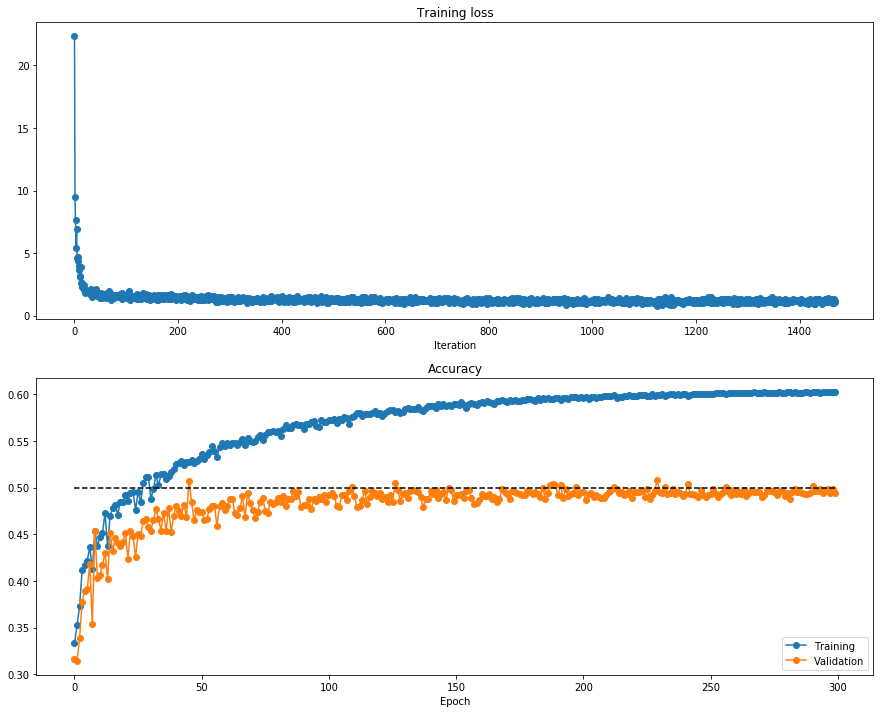

In [53]:
# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100] # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.plot(val_acc_hist, '-o', label='Validation')
plt.plot([0.5] * len(val_acc_hist), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Different Optimizers
There are several more advanced optimizers than vanilla SGD, you will implement three more sophisticated and widely-used methods in this section.  
Please complete the TODOs in the `lib/optim.py`.

## SGD + Momentum
The update rule of SGD plus momentum is as shown below:  
\begin{equation}
v_t: last\ update\ of\ the\ velocity \\
\gamma: momentum \\
\eta: learning\ rate \\
v_t = \gamma v_{t-1} - \eta \nabla_{\theta}J(\theta) \\
\theta = \theta + v_t
\end{equation}
Complete the `SGDM()` function in `lib/optim.py`.

In [54]:
# Test the implementation of SGD with Momentum
N, D = 4, 5
test_sgd = sequential(fc(N, D, name="sgd_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_sgd.layers[0].params = {"sgd_fc_w": w}
test_sgd.layers[0].grads = {"sgd_fc_w": dw}

test_sgd_momentum = SGDM(test_sgd, 1e-3, 0.9)
test_sgd_momentum.velocity = {"sgd_fc_w": v}
test_sgd_momentum.step()

updated_w = test_sgd.layers[0].params["sgd_fc_w"]
velocity = test_sgd_momentum.velocity["sgd_fc_w"]

expected_updated_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print ('The following errors should be around or less than 1e-8')
print ('updated_w error: ', rel_error(updated_w, expected_updated_w))
print ('velocity error: ', rel_error(expected_velocity, velocity))

The following errors should be around or less than 1e-8
updated_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


Run the following code block to train a multi-layer fully connected network with both SGD and SGD plus Momentum. The network trained with SGDM optimizer should converge faster.

Training with Vanilla SGD...
(Iteration 1 / 200) loss: 2.6259929394065207
(Epoch 1 / 5) Training Accuracy: 0.305, Validation Accuracy: 0.247
(Epoch 2 / 5) Training Accuracy: 0.35, Validation Accuracy: 0.303
(Iteration 101 / 200) loss: 1.777599391184249
(Epoch 3 / 5) Training Accuracy: 0.36075, Validation Accuracy: 0.301
(Epoch 4 / 5) Training Accuracy: 0.42375, Validation Accuracy: 0.319
(Epoch 5 / 5) Training Accuracy: 0.44075, Validation Accuracy: 0.323

Training with SGD plus Momentum...
(Iteration 1 / 200) loss: 2.63736810892845
(Epoch 1 / 5) Training Accuracy: 0.3245, Validation Accuracy: 0.27
(Epoch 2 / 5) Training Accuracy: 0.3915, Validation Accuracy: 0.334
(Iteration 101 / 200) loss: 1.6728858931708448
(Epoch 3 / 5) Training Accuracy: 0.438, Validation Accuracy: 0.33
(Epoch 4 / 5) Training Accuracy: 0.49575, Validation Accuracy: 0.355
(Epoch 5 / 5) Training Accuracy: 0.487, Validation Accuracy: 0.343


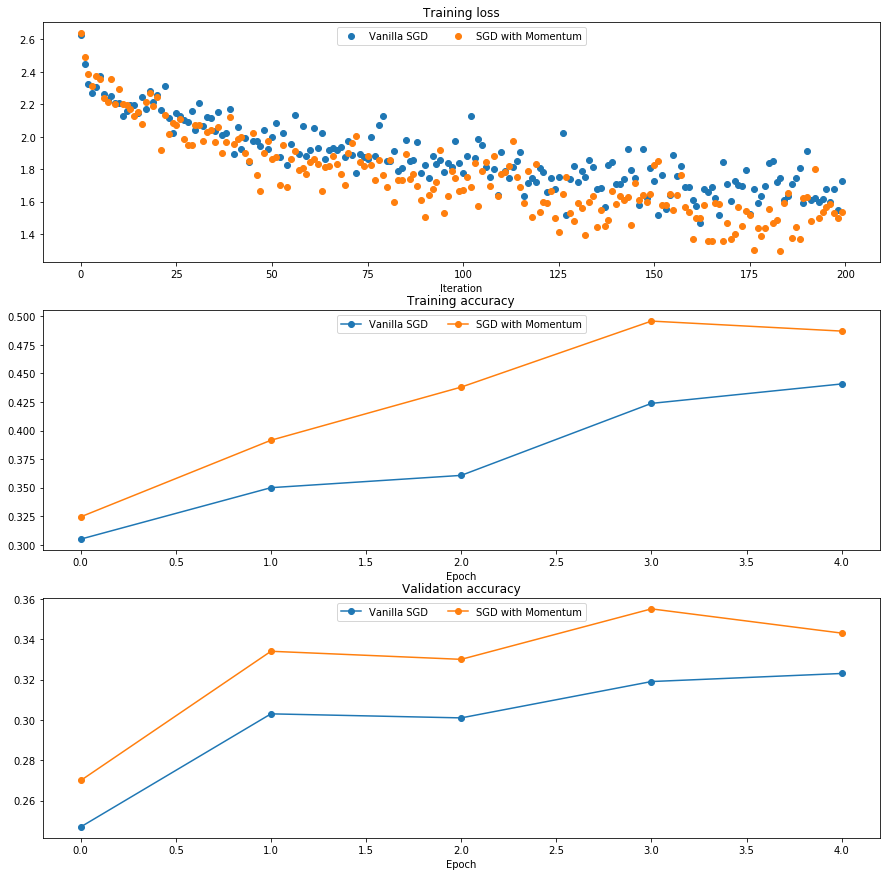

In [55]:
# Arrange a small data
num_train = 4000
small_data_dict = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

model_sgd      = FullyConnectedNetwork()
model_sgdm     = FullyConnectedNetwork()
loss_f_sgd     = cross_entropy()
loss_f_sgdm    = cross_entropy()
optimizer_sgd  = SGD(model_sgd.net, 1e-2)
optimizer_sgdm = SGDM(model_sgdm.net, 1e-2, 0.9)

print ("Training with Vanilla SGD...")
results_sgd = train_net(small_data_dict, model_sgd, loss_f_sgd, optimizer_sgd, batch_size=100, 
                        max_epochs=5, show_every=100, verbose=True)

print ("\nTraining with SGD plus Momentum...")
results_sgdm = train_net(small_data_dict, model_sgdm, loss_f_sgdm, optimizer_sgdm, batch_size=100, 
                         max_epochs=5, show_every=100, verbose=True)

opt_params_sgd,  loss_hist_sgd,  train_acc_hist_sgd,  val_acc_hist_sgd  = results_sgd
opt_params_sgdm, loss_hist_sgdm, train_acc_hist_sgdm, val_acc_hist_sgdm = results_sgdm

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## RMSProp
The update rule of RMSProp is as shown below:  
\begin{equation}
\gamma: decay\ rate \\
\epsilon: small\ number \\
g_t^2: squared\ gradients \\
\eta: learning\ rate \\
E[g^2]_t: decaying\ average\ of\ past\ squared\ gradients\ at\ update\ step\ t \\
E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2 \\
\theta_{t+1} = \theta_t - \frac{\eta \nabla_{\theta}J(\theta)}{\sqrt{E[g^2]_t+\epsilon}}
\end{equation}
Complete the RMSProp() function in optim.py

In [56]:
%reload_ext autoreload

# Test RMSProp implementation; you should see errors less than 1e-7
N, D = 4, 5
test_rms = sequential(fc(N, D, name="rms_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_rms.layers[0].params = {"rms_fc_w": w}
test_rms.layers[0].grads = {"rms_fc_w": dw}

opt_rms = RMSProp(test_rms, 1e-2, 0.99)
opt_rms.cache = {"rms_fc_w": cache}
opt_rms.step()

updated_w = test_rms.layers[0].params["rms_fc_w"]
cache = opt_rms.cache["rms_fc_w"]

expected_updated_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print ('The following errors should be around or less than 1e-7')
print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('cache error: ', rel_error(expected_cache, opt_rms.cache["rms_fc_w"]))

The following errors should be around or less than 1e-7
updated_w error:  9.502645229894295e-08
cache error:  2.6477955807156126e-09


## Adam
The update rule of Adam is as shown below:  
\begin{equation}
t = t + 1 \\
g_t: gradients\ at\ update\ step\ t \\
m_t = \beta_1m_{t-1} + (1-\beta_1)g_t \\
v_t = \beta_2v_{t-1} + (1-\beta_2)g_t^2 \\
\hat{m_t} = m_t / (1 - \beta_1^t) \\
\hat{v_t} = v_t / (1 - \beta_2^t) \\
\theta_{t+1} = \theta_t - \frac{\eta\ \hat{m_t}}{\sqrt{\hat{v_t}}+\epsilon} \\
\end{equation}
Complete the Adam() function in optim.py

In [57]:
%reload_ext autoreload

# Test Adam implementation; you should see errors around 1e-7 or less
N, D = 4, 5
test_adam = sequential(fc(N, D, name="adam_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

test_adam.layers[0].params = {"adam_fc_w": w}
test_adam.layers[0].grads = {"adam_fc_w": dw}

opt_adam = Adam(test_adam, 1e-2, 0.9, 0.999, t=5)
opt_adam.mt = {"adam_fc_w": m}
opt_adam.vt = {"adam_fc_w": v}
opt_adam.step()

updated_w = test_adam.layers[0].params["adam_fc_w"]
mt = opt_adam.mt["adam_fc_w"]
vt = opt_adam.vt["adam_fc_w"]

expected_updated_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print ('The following errors should be around or less than 1e-7')
print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('mt error: ', rel_error(expected_m, mt))
print ('vt error: ', rel_error(expected_v, vt))

The following errors should be around or less than 1e-7
updated_w error:  1.1395691798535431e-07
mt error:  4.214963193114416e-09
vt error:  4.208314038113071e-09


## Comparing the optimizers
Run the following code block to compare the plotted results among all the above optimizers. You should see SGD with Momentum, RMSProp, and Adam optimizers work better than Vanilla SGD optimizer.

Training with RMSProp...
(Iteration 1 / 200) loss: 2.7418745117050833
(Epoch 1 / 5) Training Accuracy: 0.34375, Validation Accuracy: 0.293
(Epoch 2 / 5) Training Accuracy: 0.446, Validation Accuracy: 0.358
(Iteration 101 / 200) loss: 1.5094693958189345
(Epoch 3 / 5) Training Accuracy: 0.501, Validation Accuracy: 0.368
(Epoch 4 / 5) Training Accuracy: 0.532, Validation Accuracy: 0.342
(Epoch 5 / 5) Training Accuracy: 0.5955, Validation Accuracy: 0.376

Training with Adam...
(Iteration 1 / 200) loss: 2.3062926804479558
(Epoch 1 / 5) Training Accuracy: 0.38625, Validation Accuracy: 0.325
(Epoch 2 / 5) Training Accuracy: 0.4425, Validation Accuracy: 0.357
(Iteration 101 / 200) loss: 1.6907850792850365
(Epoch 3 / 5) Training Accuracy: 0.52675, Validation Accuracy: 0.382
(Epoch 4 / 5) Training Accuracy: 0.58675, Validation Accuracy: 0.4
(Epoch 5 / 5) Training Accuracy: 0.6365, Validation Accuracy: 0.383


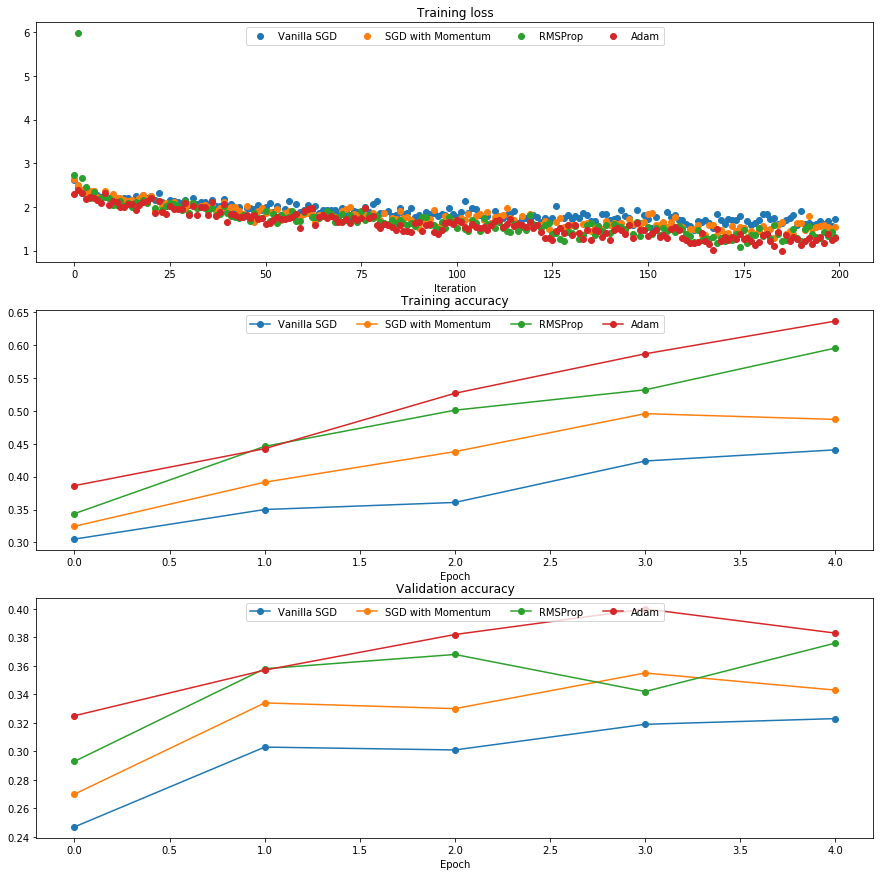

In [58]:
model_rms      = FullyConnectedNetwork()
model_adam     = FullyConnectedNetwork()
loss_f_rms     = cross_entropy()
loss_f_adam    = cross_entropy()
optimizer_rms  = RMSProp(model_rms.net, 5e-4)
optimizer_adam = Adam(model_adam.net, 5e-4)

print ("Training with RMSProp...")
results_rms = train_net(small_data_dict, model_rms, loss_f_rms, optimizer_rms, batch_size=100, 
                        max_epochs=5, show_every=100, verbose=True)

print ("\nTraining with Adam...")
results_adam = train_net(small_data_dict, model_adam, loss_f_adam, optimizer_adam, batch_size=100, 
                         max_epochs=5, show_every=100, verbose=True)

opt_params_rms,  loss_hist_rms,  train_acc_hist_rms,  val_acc_hist_rms  = results_rms
opt_params_adam, loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = results_adam

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")

plt.subplot(3, 1, 1)
plt.plot(loss_hist_rms, 'o', label="RMSProp")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_rms, '-o', label="RMSProp")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_rms, '-o', label="RMSProp")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_adam, 'o', label="Adam")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_adam, '-o', label="Adam")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_adam, '-o', label="Adam")
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## Training a Network with Dropout
Run the following code blocks to compare the results with and without dropout

In [59]:
# Train two identical nets, one with dropout and one without
num_train = 200
data_dict_500 = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

solvers = {}
keep_ps = [0, 0.25, 0.50, 0.75]

results_dict = {}
for keep_prob in keep_ps:
    results_dict[keep_prob] = {}

for keep_prob in keep_ps:
    print ("Dropout Keep Prob =", keep_prob)
    model = DropoutNetTest(keep_prob=keep_prob)
    loss_f = cross_entropy()
    optimizer = SGD(model.net, 1e-4)
    results = train_net(data_dict_500, model, loss_f, optimizer, batch_size=100, 
                        max_epochs=25, show_every=100, verbose=True)
    opt_params, loss_hist, train_acc_hist, val_acc_hist = results
    results_dict[keep_prob] = {
        "opt_params": opt_params, 
        "loss_hist": loss_hist, 
        "train_acc_hist": train_acc_hist, 
        "val_acc_hist": val_acc_hist
    }

Dropout Keep Prob = 0
(Iteration 1 / 50) loss: 2.6132003572996974
(Epoch 1 / 25) Training Accuracy: 0.075, Validation Accuracy: 0.069
(Epoch 2 / 25) Training Accuracy: 0.085, Validation Accuracy: 0.074
(Epoch 3 / 25) Training Accuracy: 0.09, Validation Accuracy: 0.074
(Epoch 4 / 25) Training Accuracy: 0.09, Validation Accuracy: 0.076
(Epoch 5 / 25) Training Accuracy: 0.105, Validation Accuracy: 0.082
(Epoch 6 / 25) Training Accuracy: 0.11, Validation Accuracy: 0.084
(Epoch 7 / 25) Training Accuracy: 0.13, Validation Accuracy: 0.092
(Epoch 8 / 25) Training Accuracy: 0.14, Validation Accuracy: 0.096
(Epoch 9 / 25) Training Accuracy: 0.165, Validation Accuracy: 0.094
(Epoch 10 / 25) Training Accuracy: 0.165, Validation Accuracy: 0.1
(Epoch 11 / 25) Training Accuracy: 0.2, Validation Accuracy: 0.106
(Epoch 12 / 25) Training Accuracy: 0.2, Validation Accuracy: 0.109
(Epoch 13 / 25) Training Accuracy: 0.22, Validation Accuracy: 0.115
(Epoch 14 / 25) Training Accuracy: 0.22, Validation Accura

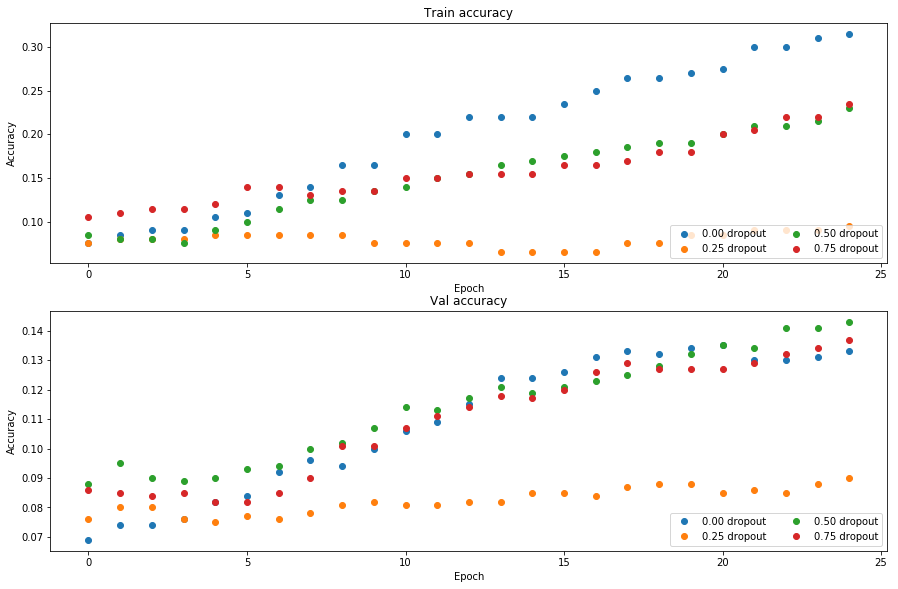

In [60]:
# Plot train and validation accuracies of the two models
train_accs = []
val_accs = []
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    train_accs.append(curr_dict["train_acc_hist"][-1])
    val_accs.append(curr_dict["val_acc_hist"][-1])

plt.subplot(3, 1, 1)
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    plt.plot(curr_dict["train_acc_hist"], 'o', label='%.2f dropout' % keep_prob)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
  
plt.subplot(3, 1, 2)
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    plt.plot(curr_dict["val_acc_hist"], 'o', label='%.2f dropout' % keep_prob)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()

### Inline Question: Describe what you observe from the above results and graphs
#### Ans:
Without the dropout, there's a huge gap between training accuracy and validation accuracy (validation about 50% of training accuracy) indicating an overfitting to the training data and not generalizing well for new data. With dropout, though the overall accuracy is lesser, the training accuracy and test accuracy are more similar (validation about 75% of training accuracy). So it may take longer time to train with dropout to achieve a reasonable training accuracy however the model would be more performant with new data.

## Plot the Activation Functions
In each of the activation function, use the given lambda function template to plot their corresponding curves.

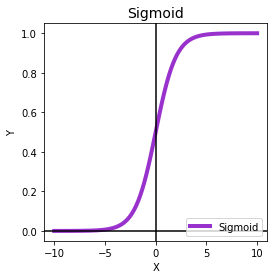

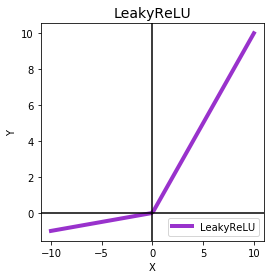

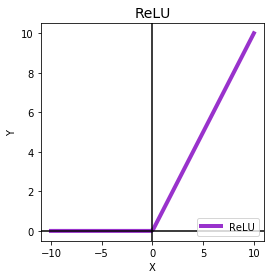

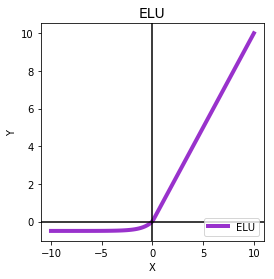

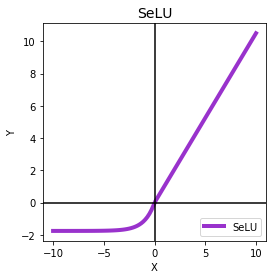

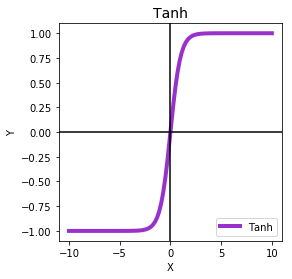

In [61]:
left, right = -10, 10
X  = np.linspace(left, right, 100)
XS = np.linspace(-5, 5, 10)
lw = 4
alpha = 0.1 # alpha for leaky_relu
elu_alpha = 0.5
selu_alpha = 1.6732
selu_scale = 1.0507

#########################
####### YOUR CODE #######
#########################
elu_helper = np.frompyfunc(lambda x, alpha: x if x >= 0 else alpha * (np.exp(x)-1), 2, 1)
sigmoid = lambda x: 1/(1+np.exp(-x))
leaky_relu = lambda x: np.maximum(x, alpha*x)
relu = lambda x: np.maximum(x, 0)
elu = lambda x: elu_helper(x, elu_alpha).astype(dtype = x.dtype)
selu = lambda x: selu_scale * elu_helper(x, selu_alpha).astype(dtype = x.dtype)
tanh = lambda x: np.tanh(x)
#########################
### END OF YOUR CODE ####
#########################

activations = {
    "Sigmoid": sigmoid,
    "LeakyReLU": leaky_relu,
    "ReLU": relu,
    "ELU": elu,
    "SeLU": selu,
    "Tanh": tanh
}

# Ground Truth activations
GT_Act = {
    "Sigmoid": [0.00669285092428, 0.0200575365379, 0.0585369028744, 0.158869104881, 0.364576440742, 
                0.635423559258, 0.841130895119, 0.941463097126, 0.979942463462, 0.993307149076],
    "LeakyReLU": [-0.5, -0.388888888889, -0.277777777778, -0.166666666667, -0.0555555555556, 
                  0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ReLU": [-0.0, -0.0, -0.0, -0.0, -0.0, 0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ELU": [-0.4966310265, -0.489765962143, -0.468911737989, -0.405562198581, -0.213123289631, 
            0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "SeLU": [-1.74618571868, -1.72204772347, -1.64872296837, -1.42598202974, -0.749354802287, 
             0.583722222222, 1.75116666667, 2.91861111111, 4.08605555556, 5.2535],
    "Tanh": [-0.999909204263, -0.999162466631, -0.992297935288, -0.931109608668, -0.504672397722, 
             0.504672397722, 0.931109608668, 0.992297935288, 0.999162466631, 0.999909204263]
} 

for label in activations:
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(X, activations[label](X), color='darkorchid', lw=lw, label=label)
    assert rel_error(activations[label](XS), GT_Act[label]) < 1e-9, \
           "Your implementation of {} might be wrong".format(label)
    ax.legend(loc="lower right")
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title('{}'.format(label), fontsize=14)
    plt.xlabel(r"X")
    plt.ylabel(r"Y")
    plt.show()